# Figures: cross-validation results

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import sys
sys.path.append('../code')
import sparseRRR

In [2]:
scala2020cv   = pickle.load(open('../pickles/cvresults-scala2020.pickle', 'rb'))
purkinjecv   = pickle.load(open('../pickles/cvresults-purkinje.pickle', 'rb'))

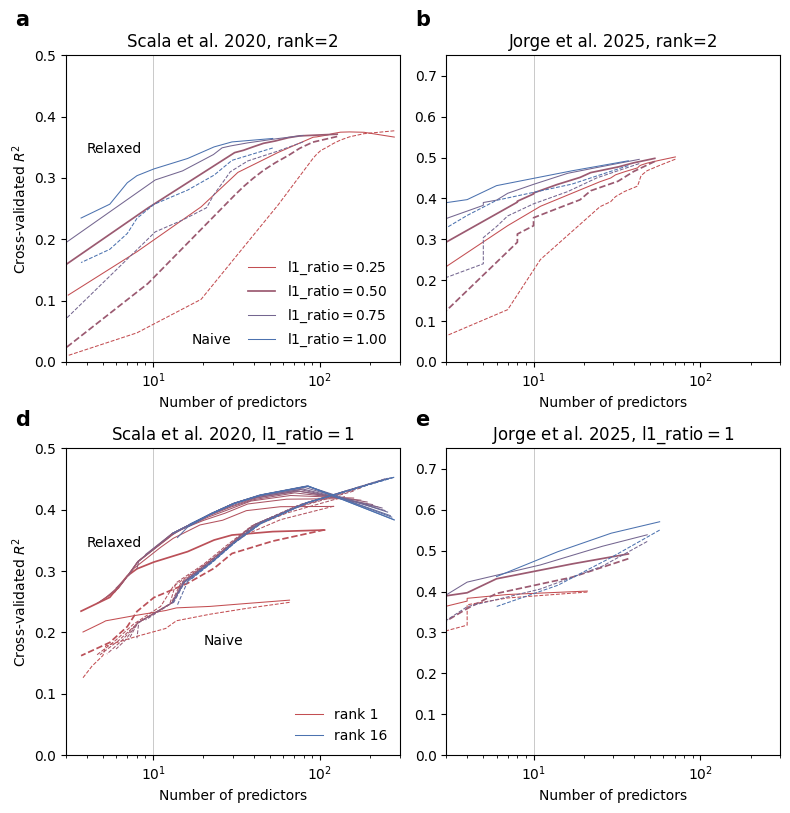

In [3]:
import warnings

fig = plt.figure(figsize=(8, 8))

ylims = [.5, .75]
highlight = [1, 1]
l1_ratios = [.25,.5,.75, 1]
l1_ratio_used = [1, 1]
titles = ['Scala et al. 2020', 'Jorge et al. 2025']

for datasetnum, cvresults in enumerate([scala2020cv, purkinjecv]):

    plt.subplot(2,2,datasetnum+1)
    colA = np.array([76, 114, 176]) / 256
    colB = np.array([196, 78, 82])  / 256
    for l1_ratio_id in range(4):
        # suppressing "mean of empty slice" warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            n = np.nanmean(cvresults[0][2], axis=(0,1))
            c = np.nanmean(cvresults[0][0], axis=(0,1))
            cr = np.nanmean(cvresults[0][1], axis=(0,1))
        
        if l1_ratio_id == highlight[datasetnum]:
            lw = 1.25
        else:
            lw = .75
        col = (colA * l1_ratio_id/3 + colB * (3-l1_ratio_id)/3)
        plt.plot(n[:,l1_ratio_id], cr[:,l1_ratio_id], linewidth=lw, color=col, 
                 label=r'l1_ratio$={:.2f}$'.format(l1_ratios[l1_ratio_id]))
        plt.plot(n[:,l1_ratio_id], c[:,l1_ratio_id], '--', linewidth=lw, color=col)

    if datasetnum==0:
        plt.legend(frameon=False)
        plt.text(4, .34, 'Relaxed', fontsize=10)
        plt.text(17, .03, 'Naive', fontsize=10)
        plt.ylabel(r'Cross-validated $R^2$')
    plt.xscale('log')
    plt.xlabel('Number of predictors')#, labelpad=-3)
    plt.title(titles[datasetnum] + ', rank=2')
    plt.ylim([0, ylims[datasetnum]])
    plt.xlim([3, 300])
    plt.plot([10,10], [0,ylims[datasetnum]], color=[.7,.7,.7], linewidth=.5, zorder=0)
    

    plt.subplot(2,2,datasetnum+3)
    colA = np.array([76, 114, 176]) / 256
    colB = np.array([196, 78, 82])  / 256
    maxRank = len(cvresults[1])
    for rank in range(1,maxRank+1):
        # suppressing "mean of empty slice" warnings
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            n = np.nanmean(cvresults[1][rank][2], axis=(0,1))
            c = np.nanmean(cvresults[1][rank][0], axis=(0,1))
            cr = np.nanmean(cvresults[1][rank][1], axis=(0,1))
    
        if rank==2:
            lw = 1.25
        else:
            lw = .75
        col = (colA * (rank-1)/(maxRank-1) + colB * (maxRank-rank)/(maxRank-1))
        if rank==1 or rank==maxRank:
            plt.plot(n, cr, color=col, linewidth=lw, label='rank {}'.format(rank))
        else:
            plt.plot(n, cr, color=col, linewidth=lw)    
        plt.plot(n, c, '--', color=col, linewidth=lw)

    if datasetnum==0:
        plt.legend(loc='lower right', frameon=False)
        plt.text(4, .34, 'Relaxed', fontsize=10)
        plt.text(20, .18, 'Naive', fontsize=10)
        plt.ylabel(r'Cross-validated $R^2$')
    plt.xscale('log')
    plt.xlabel('Number of predictors')#, labelpad=-3)
    plt.title(titles[datasetnum] + r', l1_ratio$={}$'.format(l1_ratio_used[datasetnum]))
    plt.ylim([0, ylims[datasetnum]])
    plt.xlim([3, 300])
    plt.plot([10,10], [0,ylims[datasetnum]], color=[.7,.7,.7], linewidth=.5, zorder=0)

plt.tight_layout()

fig.text(.025, .99, 'a', fontsize=15, fontweight='bold')
fig.text(.525, .99, 'b', fontsize=15, fontweight='bold')
fig.text(.025, .49, 'd', fontsize=15, fontweight='bold')
fig.text(.525, .49, 'e', fontsize=15, fontweight='bold')

plt.savefig('cv.png', dpi=200)
plt.savefig('cv.pdf')

In [4]:
import warnings

alphaid = [1,1,3,3]

for datasetnum, cvresults in enumerate([scala2020cv, purkinjecv]):
    # suppressing "mean of empty slice" warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        n  = np.nanmean(cvresults[0][2], axis=(0,1))[:,alphaid[datasetnum]]
        c  = np.nanstd (cvresults[0][0], axis=(0,1))[:,alphaid[datasetnum]]
        cr = np.nanstd (cvresults[0][1], axis=(0,1))[:,alphaid[datasetnum]]
        
        c = c[np.nanargmin(np.abs(n-20))]
        cr = cr[np.nanargmin(np.abs(n-20))]
        
        print('{:20} -- naive std: {:.2f}, relaxed std: {:.2f}'.format(titles[datasetnum], c, cr))

Scala et al. 2020    -- naive std: 0.01, relaxed std: 0.01
Jorge et al. 2025    -- naive std: 0.00, relaxed std: 0.00
